fait par Njiagupmun njankouo

In [26]:
# 1. Importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp
from sklearn.datasets import load_iris

# 2. chargement du dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Sélection binaire: Setosa (0) et Versicolor (1)
df_bin = df[df['species'].isin([0, 1])][['sepal length (cm)', 'sepal width (cm)', 'species']]
print(df_bin.head())
print(f"Nombre d'observations utilisées: {df_bin.shape[0]}")

   sepal length (cm)  sepal width (cm)  species
0                5.1               3.5        0
1                4.9               3.0        0
2                4.7               3.2        0
3                4.6               3.1        0
4                5.0               3.6        0
Nombre d'observations utilisées: 100


In [27]:
# 3. Choix d’une observation

# Exemple : première observation (Setosa = 0)
y_obs = df_bin['species'].iloc[0]   # 0 ou 1
print(f"\nClasse réelle de l'exemple choisi: {y_obs} (0=setosa, 1=versicolor)")



Classe réelle de l'exemple choisi: 0 (0=setosa, 1=versicolor)


In [37]:
# 4. Définition symbolique de la CCE
y, p = sp.symbols('y p', positive=True)
CCE = -(y*sp.log(p) + (1-y)*sp.log(1-p))
grad_CCE = sp.diff(CCE, p)      # dérivée 1ère
hess_CCE = sp.diff(CCE, p, 2)   # dérivée 2ème

print("\nFonction d'entropie croisée :", CCE)
print("Gradient :", grad_CCE)
print("Dérivée seconde (Hessienne) :", hess_CCE)

# Vérification théorique de la convexité
print("\nAnalyse :")
print("La dérivée seconde =", hess_CCE)
print("Elle est > 0 pour 0 < p < 1 → La fonction est convexe.")


Fonction d'entropie croisée : -y*log(p) - (1 - y)*log(1 - p)
Gradient : (1 - y)/(1 - p) - y/p
Dérivée seconde (Hessienne) : -(y - 1)/(p - 1)**2 + y/p**2

Analyse :
La dérivée seconde = -(y - 1)/(p - 1)**2 + y/p**2
Elle est > 0 pour 0 < p < 1 → La fonction est convexe.



Toutes les valeurs de la dérivée seconde sont positives ? True


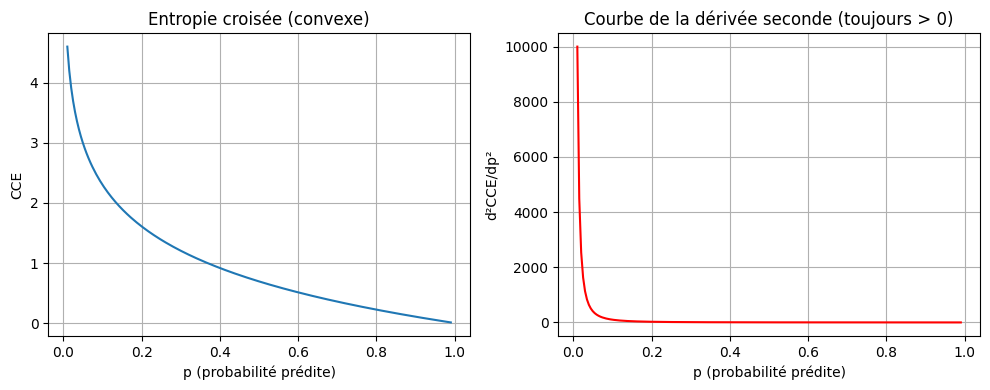

In [41]:

# 2. Vérification numérique et visualisation

import numpy as np
import matplotlib.pyplot as plt

# Classe réelle : y_obs = 1 (par exemple)
y_obs = 1

# Valeurs de p entre 0.01 et 0.99
p_vals = np.linspace(0.01, 0.99, 200)

# Fonction et dérivée seconde numériques
CCE_func = sp.lambdify((y, p), CCE, 'numpy')
Hess_func = sp.lambdify((y, p), hess_CCE, 'numpy')

CCE_vals = CCE_func(y_obs, p_vals)
Hess_vals = Hess_func(y_obs, p_vals)

# Vérification de la positivité de la Hessienne
print("\nToutes les valeurs de la dérivée seconde sont positives ?",
      np.all(Hess_vals > 0))

# Tracé
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(p_vals, CCE_vals)
plt.xlabel("p (probabilité prédite)")
plt.ylabel("CCE")
plt.title("Entropie croisée (convexe)")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(p_vals, Hess_vals, 'r')
plt.xlabel("p (probabilité prédite)")
plt.ylabel("d²CCE/dp²")
plt.title("Courbe de la dérivée seconde (toujours > 0)")
plt.grid(True)

plt.tight_layout()
plt.show()


In [39]:
# 6. Représentation graphique pour une observation

# On fait varier la prédiction p entre 0.01 et 0.99
p_vals = np.linspace(0.01, 0.99, 200)
cce_vals = [-(y_obs*np.log(p) + (1-y_obs)*np.log(1-p)) for p in p_vals]

# Point choisi pour la tangente (ex: p=0.7)
p0 = 0.7
cce0 = -(y_obs*np.log(p0) + (1-y_obs)*np.log(1-p0))
slope = float(grad_CCE.subs({y:y_obs, p:p0}))

# Equation de la tangente: L(p) ≈ slope*(p - p0) + cce0
tangent_vals = slope * (p_vals - p0) + cce0

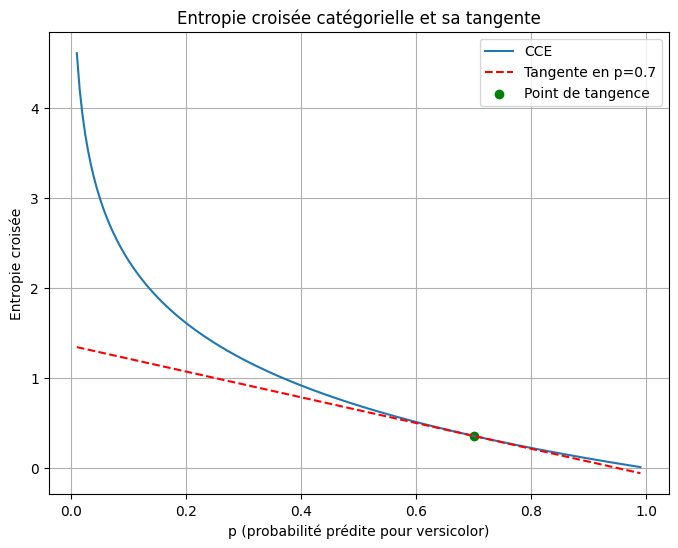

In [40]:
# 7. Tracé
plt.figure(figsize=(8,6))
plt.plot(p_vals, cce_vals, label="CCE")
plt.plot(p_vals, tangent_vals, 'r--', label=f"Tangente en p={p0}")
plt.scatter([p0], [cce0], color='green', label="Point de tangence")
plt.xlabel("p (probabilité prédite pour versicolor)")
plt.ylabel("Entropie croisée")
plt.title("Entropie croisée catégorielle et sa tangente")
plt.legend()
plt.grid(True)
plt.show()